# SYSC4906 Assignment 3

**Group Name:** Luke and Eric

**Student names:** Luke Newton, Eric Bedard

**Student numbers:** 100999309, 101009607


# Discussion of Solution
Your notebook must begin with **this** text cell containing a description of your solution. In this discussion, include links to any resources that you used in developing your solution. Use proper MarkDown syntax to format your discussion.**This description should be approximately 500 words in length and cover the following:**

1. Which machine learning approach did you use?

2. How did you split your data between training and testing? 
_(e.g. hold-out test, cross-validation, repeated bootstrap samples, etc)_

3. How did you train your classifier?
If you used transfer learning, describe how you did so.

4. How did you estimate your future performance _(worst recall, best precision, overall accuracy)_?

   **Here are our final predictions:**
   1. Building with worst recall:
   2. Building with best precision
   3. Overall accuracy)

5. Discuss the performance of your model. Which buildings did it do the best/worst on and why? What are the strengths and limitations of your method. 

6. What would you have done differently if you had more time?

*************************************************************************
<br/>

### Our Discusion of Solution:
Our machine learning approach is a convolutional neural network, using the group members' assignment 2 as a baseline. We trained for a short time with different optimizers, kernel sizes, and strides, then selected the values which showed the most promise and trained that model for longer. As the model was trained for longer, more dropout was added as a regualrization technique to mitigate overfitting. With each subsequent layer, image size shrinks and the number of nodes grow so that eventually we can throw out the small image and use a dense layer to get a final value. The dataset was augmented with shifts to account for different angles of shots, and flips for different orientations of images.

We tested our model with a holdout set after training was complete in order to get an idea of how well it would perform on training data. After all these predictions were made, we built a confusion matrix and used that to estimate our worst recall and best precision. We also kept track of the total number of correct predictions to get a ballpark estimate for accuracy.

   **Here are our final predictions:**
   1. Building with worst recall: AA
   2. Building with best precision: AA
   3. Overall accuracy: 0.8

The model overall performs well on the holdout set despite images being in different orientations because we augmented the data with vertical and horizontal flips. This may have a draw back however as buildings in one orientation may be predicted as buildings in anthor orientation. 

Architecture building has the highest precision in our holdout set, while minto has the lowest precision. Architecture building looks very distinct, so it makes sense that not many other buildings were predicted as being Architecture. Minto has very dark bricks, and looking at our predictions on our holdout set, many other images of other buildings in the shade (so they look darker) were classified as Minto. This problem might be less significant if more of the images of minto in the training data were taken on a less cloudy day, so both the bricks and reflection in the windows were brighter.

Minto and Fieldhouse had perfect recall, while Architecture has the lowest recall. Architecture likely performs poorly in this metric due how widely varied is faces are and the complex shapes within them. The model might be seeing aspects of other buildings in pictures of Architecture, so it mislabels them. Minto likely has high recall for the same reason it has low precision: it is very dark. As expected, Fieldhouse also performed very well due to each side looking similar and the distinct red stripe. One interesting point here is that one of the photos of Architecture has a line of red glare across it. It seems as though the model recognized the red stripe, and classified the image of Architecture as Fieldhouse.

If we had more time, we would have liked to augment data with different zooms as well, but could not figure out how to in the time we had. It would also be interesting to replace the final dense layer with another type of model, such as a random forest.


#Required functions to test your method
_These are the five required methods that you must implement._

## prepareModel()
This function should prepare your model for multiple invocations of classifyImage(fname). For example, this function could be used to load a pre-trained model from a URL, where that model is then used by  classifyImage(fname). You should use global variables for any variables initialized by this function.

Runtime of this method is **limited to 5 minutes**, so please don’t retrain your network here. All training should be captured in a pre-trained model to be loaded by this method.


In [0]:
import pickle
import os

# List of building codes to use throughout notebook.
buildingCodes = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

def prepareModel():
  global model # Sample global variable that you may populate here.

  !wget https://github.com/LukeANewton/CarletonU-Building-Classification/blob/master/model.pkl?raw=true

  file = open('/content/model.pkl?raw=true', 'rb')
  model = pickle.load(file)
  file.close()

## label = classifyImage(fname)
Accepts a filename (e.g. ‘test/ME/testImage1.jpg’) of a square JPG image with size at least 500x500 pixels.
Returns a 2-character label corresponding to the predicted building (see table of labels above)

Any variables initialized by prepareModel() should be declared as global within this function if you want to access them (e.g. a pre-trained model)


In [2]:
from keras.preprocessing.image import img_to_array

def classifyImage(fname):
  global model # Sample global variable that you may populate in prepareModel and use here.

  print("Predicting class of '{0:s}' using model".format(fname))
  #open image
  img = Image.open(fname)
  #resize image if necessary
  width, height = img.size
  if width != 500 or height != 500:
    img = img.resize((500, 500))
  #convert image to numpy array and normalize
  x = img_to_array(img).astype('float32')
  x = x / 255.0
  x = np.expand_dims(x, axis=0)
  #make prediction
  y = model.predict(x)
  label = buildingCodes[np.where(y[0] == max(y[0]))[0][0]]
  return label


Using TensorFlow backend.


## label = worstRecall()
Returns the label of a building that you expect will have to lowest recall, when tested on new images

Using our model and a holdout set of ~20 images of each building, most buildings were correctly predicted 17-20 out of 20 times. For architecture building, only 10 of those 20 times is was correctly labelled, so it has our lowest recall 

In [0]:
def worstRecall():
  return buildingCodes[0] #architecture 


## label = bestPrecision()
Returns the label of a building that you expect will have to highest precision, when tested on new images

Using our model and a holdout set, we found that no buildings that were not architecture were labelled as architecture, so it has the highest precision

In [0]:
def bestPrecision():
  return buildingCodes[0] #architecture


##acc_score = estimatedAccuracy()
Returns the accuracy (between [0.0,1.0]) that you expect to achieve across all test images, assuming that each building is equally represented


In [0]:
# Function to return estimated accuracy that will be obtained across all test images
def estimatedAccuracy():
  return 0.8

# Test required functions
_We will replace the text below with our actual test code..._

--2019-12-03 22:33:09--  https://github.com/LukeANewton/CarletonU-Building-Classification/blob/master/model.pkl?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/LukeANewton/CarletonU-Building-Classification/raw/master/model.pkl [following]
--2019-12-03 22:33:10--  https://github.com/LukeANewton/CarletonU-Building-Classification/raw/master/model.pkl
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LukeANewton/CarletonU-Building-Classification/master/model.pkl [following]
--2019-12-03 22:33:10--  https://raw.githubusercontent.com/LukeANewton/CarletonU-Building-Classification/master/model.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubuserconte

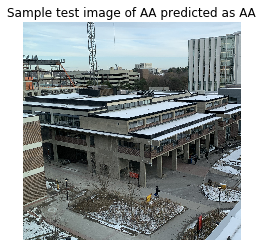

Correct!
Predicting class of 'SampleImages/CB_1.jpg' using model


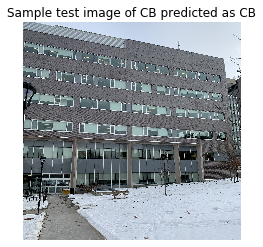

Correct!
Predicting class of 'SampleImages/DT_1.jpg' using model


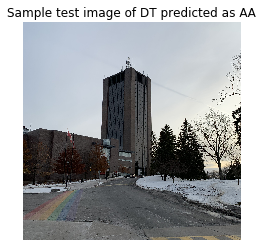

Incorrect...
Predicting class of 'SampleImages/HS_1.jpg' using model


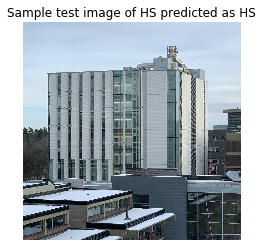

Correct!
Expected that worst recall would be on AA
Expected that best precision would be on AA
Expected total accuracy would be 0.800
Actual total accuracy is 0.750


In [6]:
import numpy as np
from PIL import Image, ExifTags
import matplotlib.pyplot as plt
from glob import glob

# First prepare the model:
prepareModel() # Limited to 5 minutes...

# Load (secret) test data into local Colab environment
!wget https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
!unzip SampleImages.zip?raw=true #Should create 4 images
test_images = sorted(glob('SampleImages/*.jpg'))
actual_labels = (buildingCodes[0],buildingCodes[1],buildingCodes[3],buildingCodes[6])

# Classify sample test images:
TP = 0
for imgFname,actual_label in (zip(test_images,actual_labels)):
  pred_label = classifyImage(imgFname) # Predict the label of this image file

  # Plot the image with actual and predicted labels
  # Note that we may have to rotate the image, depending on the 
  # orientation of the camera. Use EXIF tags for this:
  im = Image.open(imgFname)
  for orientation in ExifTags.TAGS.keys() : 
    if ExifTags.TAGS[orientation]=='Orientation' : break 
  exif=dict(im._getexif().items())

  if exif[orientation] == 3 : 
    im=im.rotate(180, expand=True)
  elif exif[orientation] == 6 : 
    im=im.rotate(270, expand=True)
  elif exif[orientation] == 8 : 
    im=im.rotate(90, expand=True)

  im = im.convert('RGB') # May not be necessary?

  plt.title("Sample test image of {0:s} predicted as {1:s}".format(actual_label, pred_label))
  plt.imshow(np.asarray(im))
  plt.axis('off')
  plt.show()

  if (pred_label==actual_label):
    print('Correct!')
    TP += 1
  else:
    print("Incorrect...")

# Print the predicted performance:
print("Expected that worst recall would be on {0:s}".format(worstRecall()))
print("Expected that best precision would be on {0:s}".format(bestPrecision()))
print("Expected total accuracy would be {0:.3f}".format(estimatedAccuracy()))
print("Actual total accuracy is {0:.3f}".format((TP)/(len(test_images))))
